In [60]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import missingno as msn
from column_dictionary import questions
import warnings
warnings.filterwarnings("ignore")

In [61]:
df = pd.read_csv(
    "./data/base_saludmental-sin-faltantes.csv",
    sep=";"
)

df

,timestamp,confianza_vecinos,frecuencia_habla_vecinos_mes_pasado,frecuencia_habla_vecinos_mes_normal,frecuencia_habla_amigos_familia_mes_pasado,frecuencia_habla_amigos_familia_mes_normal,cumplimiento_autocuidado_personal,cumplimiento_autocuidado_familiares,cumplimiento_autocuidado_vecinos,estrategia_comunicacion_clara,...,num_personas_hogar,num_personas_5_menos,num_personas_6_18,num_personas_19_64,num_personas_65_mas,oportunidad_expresar_sentimientos,frecuencia_actividad_fisica_mes,exposicion_violencia_hogar,diagnostico_salud_mental,continuidad_tratamiento_salud_mental
0,"44018,34521",La mayoría,Nada,Algunas veces al mes,Casi todos los días,Algunas veces a la semana,5 Totalmente,5 Totalmente,5 Totalmente,Sí,...,Cuatro,Una,Una,Dos,Ninguna,Sí,Ninguna vez,1.0,No,No aplica
1,"44018,34595",Algunos,Nada,Nada,Casi todos los días,Algunas veces al mes,5 Totalmente,4,3,No,...,Dos,Ninguna,Ninguna,Una,Ninguna,Sí,Menos de una vez a la semana,1.0,Sí,Sí
2,"44018,34611",Algunos,Algunas veces a la semana,Algunas veces a la semana,Casi todos los días,Casi todos los días,5 Totalmente,5 Totalmente,3,Sí,...,Tres,Ninguna,Ninguna,Tres,Ninguna,Sí,Más de una vez a la semana,1.0,No,No aplica
3,"44018,35482",La mayoría,Algunas veces a la semana,Algunas veces a la semana,Casi todos los días,Casi todos los días,5 Totalmente,4,4,Sí,...,Cuatro,Ninguna,Ninguna,Cuatro,Ninguna,Sí,Más de una vez a la semana,1.0,Sí,No
4,"44018,35899",La mayoría,Algunas veces al mes,Algunas veces al mes,Algunas veces a la semana,Algunas veces a la semana,4,4,4,Sí,...,Una (vivo solo),Ninguna,Ninguna,Una,Ninguna,Sí,Una vez a la semana,1.0,No,No aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,"44033,30896",Ninguno,Una vez,Algunas veces al mes,Casi todos los días,Casi todos los días,5 Totalmente,4,1 Nada,Sí,...,Dos,Ninguna,Ninguna,Dos,Ninguna,No,Ninguna vez,2.0,No,No aplica
4994,"44033,30921",Ninguno,Nada,Nada,Algunas veces al mes,Algunas veces a la semana,4,3,3,Sí,...,Tres,Ninguna,Una,Dos,Ninguna,Sí,Ninguna vez,1.0,No,No aplica
4995,"44033,31223",La mayoría,Algunas veces al mes,No está seguro,Algunas veces a la semana,Casi todos los días,3,3,2,No sabe,...,Cinco,Una,Dos,Dos,Ninguna,No,Menos de una vez a la semana,2.0,No,No aplica
4996,"44033,34548",Algunos,No está seguro,No está seguro,Algunas veces a la semana,Algunas veces a la semana,4,4,2,Sí,...,Tres,Ninguna,Ninguna,Tres,Ninguna,Sí,Una vez a la semana,1.0,No,No aplica


Existen unas variables de texto libre donde el ciudadano puede expresarse libremente, sin embargo no ahondaré ene este momento en esas variables por lo que hago una función que filtra cada columna por la cantidad de tamaño 

In [62]:
def limpiar_variables_texto_libre(campo: pd.core.series.Series):
    # print(campo.name.upper())
    variables_unicas = len(campo.drop_duplicates())
    # print(variables_unicas," valores en esta columna","\n")
    return variables_unicas
    

In [63]:
variables_unicas_array = []

for col in df.columns:
    variables_unicas = limpiar_variables_texto_libre(df[col])
    variables_unicas_array.append(variables_unicas)

variables_unicas_array = np.array(variables_unicas_array)
variables_unicas_array
    
# promedio_variables_unicas = variables_unicas_array.sum()/len(variables_unicas_array)

# promedio_variables_unicas

array([4975,    4,    6,    6,    6,    6,    5,    5,    5,    3,    3,
          3,    3,    3,  193,    2,    2,    3,    2,    5,    5,    5,
          5,    5,    5,    5,    6,    6,    6, 1084,    5,    5,    5,
          5,    5,    5,    5,    4,   76,    5,    3,    7,   22,  124,
          2,    6,    7,    7,    7,    7,    2,    4,    6,    3,    4])

In [64]:
Q1 = np.percentile(variables_unicas_array, 25)
Q3 = np.percentile(variables_unicas_array, 75)
IQR = Q3 -Q1

In [65]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [66]:
outliers = variables_unicas_array[
    (variables_unicas_array < lower_bound) 
    |
    (variables_unicas_array > upper_bound)
]

outliers

array([4975,  193, 1084,   76,   22,  124])

In [67]:
df.shape

(4998, 55)

In [68]:
df_transform = df.copy()

for col in df_transform.columns:
    variables_unicas = limpiar_variables_texto_libre(df_transform[col])
    
    if variables_unicas in outliers:
        print(col, variables_unicas, " eliminada")
        df_transform.drop(col, axis=1, inplace=True)
        
df_transform.shape

timestamp 4975  eliminada
medios_info_alcaldia 193  eliminada
factores_preocupacion_cuarentena 1084  eliminada
edad 76  eliminada
localidad_residencia 22  eliminada
situacion_laboral 124  eliminada


(4998, 49)

In [69]:
df_transform

,confianza_vecinos,frecuencia_habla_vecinos_mes_pasado,frecuencia_habla_vecinos_mes_normal,frecuencia_habla_amigos_familia_mes_pasado,frecuencia_habla_amigos_familia_mes_normal,cumplimiento_autocuidado_personal,cumplimiento_autocuidado_familiares,cumplimiento_autocuidado_vecinos,estrategia_comunicacion_clara,estrategia_comunicacion_suficiente,...,num_personas_hogar,num_personas_5_menos,num_personas_6_18,num_personas_19_64,num_personas_65_mas,oportunidad_expresar_sentimientos,frecuencia_actividad_fisica_mes,exposicion_violencia_hogar,diagnostico_salud_mental,continuidad_tratamiento_salud_mental
0,La mayoría,Nada,Algunas veces al mes,Casi todos los días,Algunas veces a la semana,5 Totalmente,5 Totalmente,5 Totalmente,Sí,Sí,...,Cuatro,Una,Una,Dos,Ninguna,Sí,Ninguna vez,1.0,No,No aplica
1,Algunos,Nada,Nada,Casi todos los días,Algunas veces al mes,5 Totalmente,4,3,No,No,...,Dos,Ninguna,Ninguna,Una,Ninguna,Sí,Menos de una vez a la semana,1.0,Sí,Sí
2,Algunos,Algunas veces a la semana,Algunas veces a la semana,Casi todos los días,Casi todos los días,5 Totalmente,5 Totalmente,3,Sí,Sí,...,Tres,Ninguna,Ninguna,Tres,Ninguna,Sí,Más de una vez a la semana,1.0,No,No aplica
3,La mayoría,Algunas veces a la semana,Algunas veces a la semana,Casi todos los días,Casi todos los días,5 Totalmente,4,4,Sí,Sí,...,Cuatro,Ninguna,Ninguna,Cuatro,Ninguna,Sí,Más de una vez a la semana,1.0,Sí,No
4,La mayoría,Algunas veces al mes,Algunas veces al mes,Algunas veces a la semana,Algunas veces a la semana,4,4,4,Sí,No sabe,...,Una (vivo solo),Ninguna,Ninguna,Una,Ninguna,Sí,Una vez a la semana,1.0,No,No aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,Ninguno,Una vez,Algunas veces al mes,Casi todos los días,Casi todos los días,5 Totalmente,4,1 Nada,Sí,No,...,Dos,Ninguna,Ninguna,Dos,Ninguna,No,Ninguna vez,2.0,No,No aplica
4994,Ninguno,Nada,Nada,Algunas veces al mes,Algunas veces a la semana,4,3,3,Sí,No,...,Tres,Ninguna,Una,Dos,Ninguna,Sí,Ninguna vez,1.0,No,No aplica
4995,La mayoría,Algunas veces al mes,No está seguro,Algunas veces a la semana,Casi todos los días,3,3,2,No sabe,Sí,...,Cinco,Una,Dos,Dos,Ninguna,No,Menos de una vez a la semana,2.0,No,No aplica
4996,Algunos,No está seguro,No está seguro,Algunas veces a la semana,Algunas veces a la semana,4,4,2,Sí,Sí,...,Tres,Ninguna,Ninguna,Tres,Ninguna,Sí,Una vez a la semana,1.0,No,No aplica


In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
le = LabelEncoder()

In [73]:
df_transform.columns

Index(['confianza_vecinos', 'frecuencia_habla_vecinos_mes_pasado',
       'frecuencia_habla_vecinos_mes_normal',
       'frecuencia_habla_amigos_familia_mes_pasado',
       'frecuencia_habla_amigos_familia_mes_normal',
       'cumplimiento_autocuidado_personal',
       'cumplimiento_autocuidado_familiares',
       'cumplimiento_autocuidado_vecinos', 'estrategia_comunicacion_clara',
       'estrategia_comunicacion_suficiente',
       'estrategia_comunicacion_veridica', 'estrategia_comunicacion_oportuna',
       'estrategia_comunicacion_contradictoria',
       'sabe_actuar_sospechas_contagio', 'info_suficiente_COVID',
       'info_riesgos_COVID_alcaldia', 'diagnostico_COVID',
       'ansiedad_cuarentena', 'depresion_cuarentena',
       'tranquilidad_cuarentena', 'cercania_convive_cuarentena',
       'interes_placer_cuarentena', 'problemas_dormir_cuarentena',
       'desacuerdos_convive_cuarentena', 'necesidad_alcohol_cuarentena',
       'necesidad_fumar_cuarentena',
       'necesidad_sus

In [74]:
X = df_transform[df_transform.columns[:-2]] 
X.columns

Index(['confianza_vecinos', 'frecuencia_habla_vecinos_mes_pasado',
       'frecuencia_habla_vecinos_mes_normal',
       'frecuencia_habla_amigos_familia_mes_pasado',
       'frecuencia_habla_amigos_familia_mes_normal',
       'cumplimiento_autocuidado_personal',
       'cumplimiento_autocuidado_familiares',
       'cumplimiento_autocuidado_vecinos', 'estrategia_comunicacion_clara',
       'estrategia_comunicacion_suficiente',
       'estrategia_comunicacion_veridica', 'estrategia_comunicacion_oportuna',
       'estrategia_comunicacion_contradictoria',
       'sabe_actuar_sospechas_contagio', 'info_suficiente_COVID',
       'info_riesgos_COVID_alcaldia', 'diagnostico_COVID',
       'ansiedad_cuarentena', 'depresion_cuarentena',
       'tranquilidad_cuarentena', 'cercania_convive_cuarentena',
       'interes_placer_cuarentena', 'problemas_dormir_cuarentena',
       'desacuerdos_convive_cuarentena', 'necesidad_alcohol_cuarentena',
       'necesidad_fumar_cuarentena',
       'necesidad_sus

In [75]:
y = df_transform[df_transform.columns[-2:]]
y = y[y.columns[:-1]]
y.columns

Index(['diagnostico_salud_mental'], dtype='object')

In [76]:
for column in X.columns:
    X[column] = le.fit_transform(X[column])


In [77]:
y['diagnostico_salud_mental'] = le.fit_transform(y['diagnostico_salud_mental'])

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [83]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precisión del modelo: {accuracy * 100:.2f}%")


Precisión del modelo: 70.10%


In [85]:
df_transform['diagnostico_salud_mental'].drop_duplicates()

0                 No
1                 Sí
10    No está seguro
Name: diagnostico_salud_mental, dtype: object

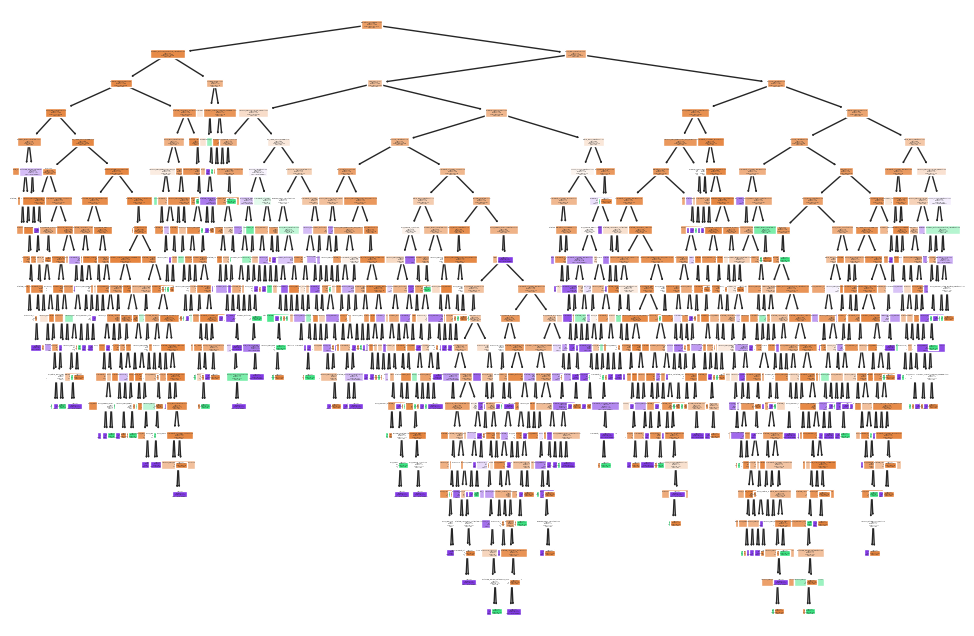

In [86]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Sí','No está seguro'], filled=True)
plt.show()
